<a href="https://colab.research.google.com/github/SamwelJane/Student-debt-crisis/blob/master/Clustering_employment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings='ignore'
# clustering
from sklearn.cluster import KMeans
import os

import math
%matplotlib inline

In [0]:
all_e=pd.read_csv('/content/drive/My Drive/Student crisis/all_employement_flow.csv')

In [0]:
all_e.shape

(1679079, 24)

In [0]:
all_e.dtypes

agg_level_pseo                    int64
inst_level                       object
institution                       int64
degree_level                      int64
cip_level                        object
cipcode                           int64
grad_cohort                       int64
grad_cohort_years                 int64
geo_level                        object
geography                        object
ind_level                        object
industry                         object
y1_grads_emp                    float64
y1_grads_emp_instate            float64
y5_grads_emp                    float64
y5_grads_emp_instate            float64
y10_grads_emp                   float64
y10_grads_emp_instate           float64
status_y1_grads_emp               int64
status_y1_grads_emp_instate       int64
status_y5_grads_emp               int64
status_y5_grads_emp_instate       int64
status_y10_grads_emp              int64
status_y10_grads_emp_instate      int64
dtype: object

In [0]:
# replace infinit value values with null
all_e = all_e.replace([np.inf, -np.inf], np.nan)

In [0]:
# # total number of missing values per column in percentage
column_with_nan = all_e.columns[all_e.isnull().any()]
all_e.shape
for column in column_with_nan:
          print(column, all_e[column].isnull().sum()/len(all_e[column])*100)

y1_grads_emp 20.144614994291512
y1_grads_emp_instate 21.269338726766282
y5_grads_emp 41.17721679563618
y5_grads_emp_instate 42.005706699922996
y10_grads_emp 65.25434479259165
y10_grads_emp_instate 65.74372021804811


In [0]:
# Drop columns with 50% and above missing values
all_e=all_e.drop(['y10_grads_emp_instate','y10_grads_emp'],axis=1)

In [0]:
# fill missing values with median
med=all_e.y1_grads_emp.mode()
med1=all_e.y1_grads_emp_instate.mode()
med2=all_e.y5_grads_emp.mode()
med3=all_e.y5_grads_emp_instate.mode()


In [0]:
all_e.y1_grads_emp.fillna(med)
all_e.y1_grads_emp_instate.fillna(med1)
all_e.y5_grads_emp.fillna(med2)
all_e.y5_grads_emp_instate.fillna(med3)
all_e.head(1)


In [0]:
cols=['institution','degree_level','cip_level', 'cipcode', 'grad_cohort', 'grad_cohort_years', 'geo_level',
       'geography', 'ind_level', 'industry', 'y1_grads_emp',
       'y1_grads_emp_instate', 'y5_grads_emp', 'y5_grads_emp_instate',
       'status_y10_grads_emp',]
df=all_e[cols]

### Replace categorical charaters

In [0]:

df.cip_level.replace('A',1,inplace=True)

In [0]:
df.geo_level.replace(['N','D'],[0,1],inplace=True)

In [0]:
df.ind_level.replace(['A','S'],[0,1],inplace=True)

In [0]:
df.industry.replace(['31-33','44-45','48-49','0'],[32,44,48,2],inplace=True)

In [0]:
df.industry.replace('ZZ',100,inplace=True)

In [0]:
df.geography.replace('Z',10,inplace=True)

In [0]:
df.to_csv('clean.csv')

In [0]:
df.head(1)

,institution,degree_level,cip_level,cipcode,grad_cohort,grad_cohort_years,geo_level,geography,ind_level,industry,y1_grads_emp,y1_grads_emp_instate,y5_grads_emp,y5_grads_emp_instate,status_y10_grads_emp
0,1345,3,1,0,0,5,0,0,0,00,961.0,197.0,321.0,78.0,1


### Normalization

In [0]:

column_names = ['y1_grads_emp', 'y1_grads_emp_instate', 'y5_grads_emp','y5_grads_emp_instate']


df[column_names] = df[column_names].apply(lambda x:(x-x.min()) / (x.max()-x.min()))



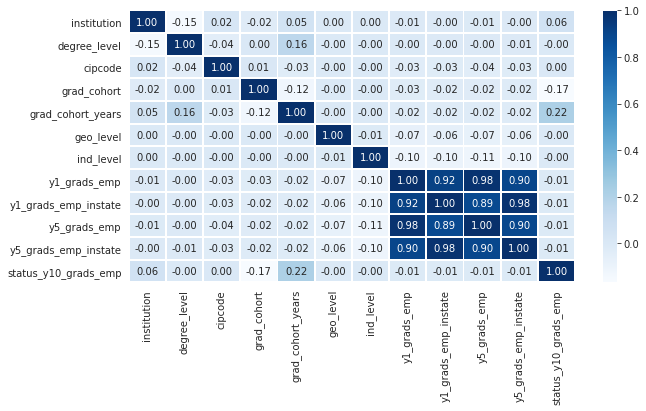

In [0]:
# corralation of variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=1)
plt.show()

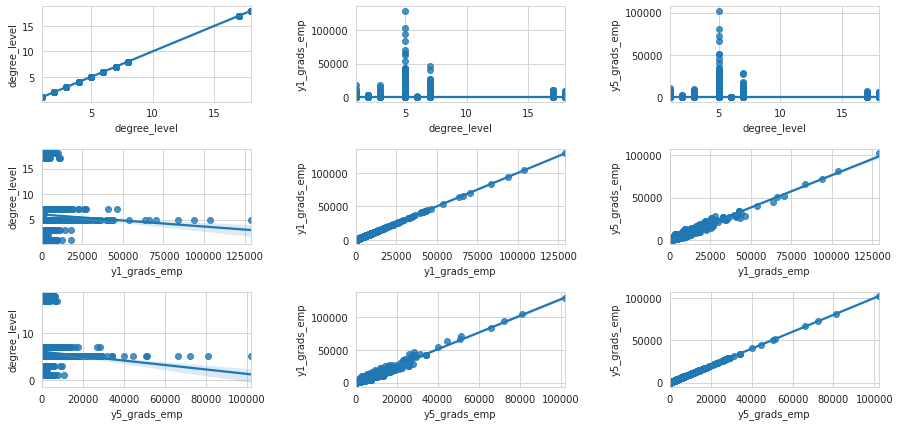

In [0]:
# correlation of degree level vs earnings
plt.figure(1,figsize=(15,7))
n=0
for x in ['degree_level','y1_grads_emp','y5_grads_emp']:
    for y in ['degree_level','y1_grads_emp','y5_grads_emp']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

In [0]:
df_km=df.dropna()
df_km.shape

(897960, 15)

# KMeans Clustering

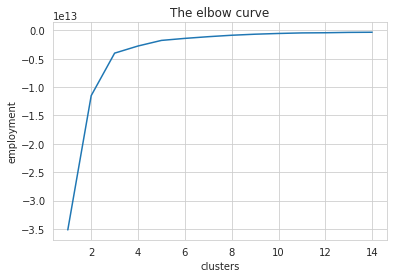

In [0]:
#Choosing the number of clustering using elbow curve  
from sklearn.cluster import KMeans
employ=[]
for a in range(1,15):
    kmeans = KMeans(n_clusters=a,init='k-means++')
    empl = kmeans.fit(df_km)
    employ.append(empl.score(df_km))
plt.plot(range(1,15),employ)
plt.xlabel('clusters')
plt.ylabel('employment')
plt.title('The elbow curve')
plt.show()

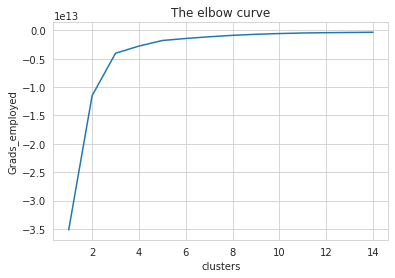

In [0]:
# Tuning the with parameters to get the number of clusters
employ=[]
for a in range(1,15):
    kmeans = KMeans(n_clusters=a, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False,
                    verbose=0, random_state=10, copy_x=True, n_jobs=None, algorithm='auto')
    empl = kmeans.fit(df_km)
    employ.append(empl.score(df_km))
plt.plot(range(1,15),employ)
plt.xlabel('clusters')
plt.ylabel('Grads_employed')
plt.title('The elbow curve')
plt.show()



On both graphs, the elbow curve is obsevred to be at cluster number 3. Thus our n_clusters=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


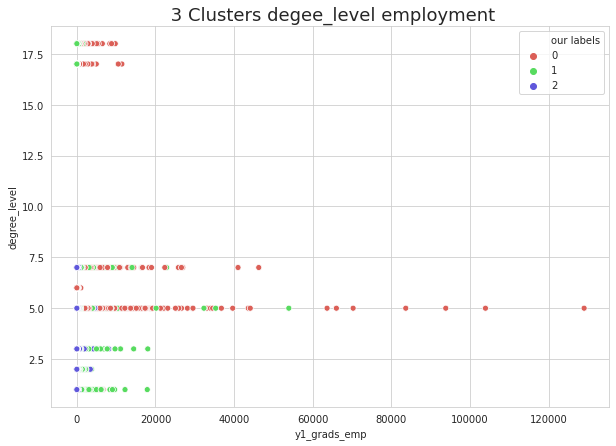

In [0]:
# visualization on clusters on the variables clustered
kmc=KMeans(n_clusters=3).fit(df_km)
df_km['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(df_km['y1_grads_emp'],df_km['degree_level'],
                hue=df_km['our labels'],palette=sns.color_palette('hls',3))
plt.title(' 3 Clusters degee_level employment',fontsize=18)
plt.show()

Degree levels Baccalaureate had the highest of number of employed in with cluster 0 being the mojarity

In cluster 1:Certificate< 1 year
 and Associates mority were cluster 1

## Degree levels
1:Certificate< 1 year

2: Certificate_1-2_years

3:Associates

4:Certificate_2-4_years

5:Baccalaureate

6:Post-Bacc Certificate

7:Masters

8:Post_Masters_Certificate,

17:Doctoral_Research_Scholarship

18:Doctoral_Professional Practice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


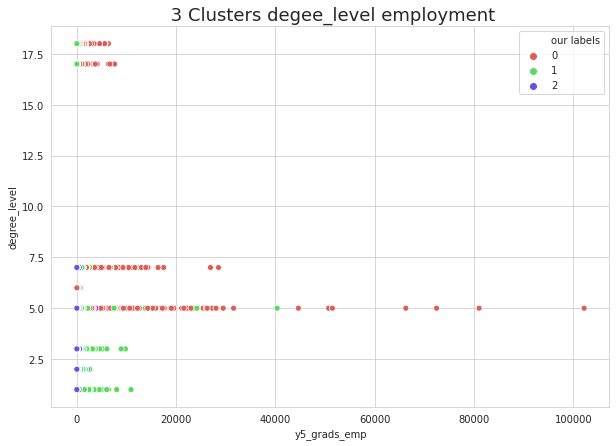

In [0]:
kmc=KMeans(n_clusters=3).fit(df_km)
df_km['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(df_km['y5_grads_emp'],df_km['degree_level'],
                hue=df_km['our labels'],palette=sns.color_palette('hls',3))
plt.title(' 3 Clusters degee_level employment',fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


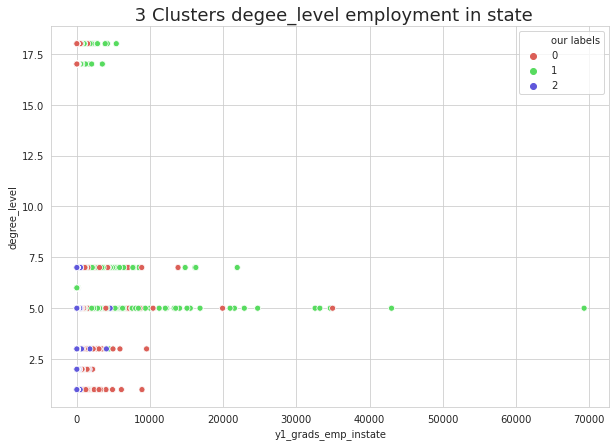

In [0]:
kmc=KMeans(n_clusters=3).fit(df_km)
df_km['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(df_km['y1_grads_emp_instate'],df_km['degree_level'],
                hue=df_km['our labels'],palette=sns.color_palette('hls',3))
plt.title(' 3 Clusters degee_level employment in state',fontsize=18)
plt.show()

## Create target column

In [0]:

kmeanc=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=10, copy_x=True, n_jobs=None, algorithm='auto')
no_cluster=kmeanc.fit_predict(df_km)

In [0]:
df_km['Cluster']=no_cluster
df_km.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,institution,degree_level,cip_level,cipcode,grad_cohort,grad_cohort_years,geo_level,geography,ind_level,industry,y1_grads_emp,y1_grads_emp_instate,y5_grads_emp,y5_grads_emp_instate,status_y10_grads_emp,our labels,Cluster
0,1345,3,1,0,0,5,0,0,0,00,961.0,197.0,321.0,78.0,1,1,0
1,1345,5,1,0,0,3,0,0,0,00,4348.0,2002.0,3691.0,1505.0,1,1,0
2,1345,7,1,0,0,5,0,0,0,00,3298.0,2311.0,2124.0,1470.0,1,1,0


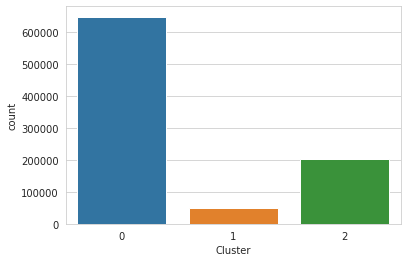

In [0]:
sns.countplot(df_km.Cluster)

In [0]:
cluster0_instition=df_km[df_km['Cluster']==0]
inst_0=cluster0_instition.groupby('institution')['Cluster'].sum().sort_values(ascending=True)
inst_0

In [0]:
inst=df_km.groupby('institution')['Cluster'].value_counts().sort_values(ascending=True)
inst.head(10)

institution  Cluster
25554        1          1680
42087        1          3150
12875        2          3360
5596         0          4200
10019        2          6510
1355         0          6720
4952         0          7140
1359         0          7140
9981         2          7350
3659         0          7350
Name: Cluster, dtype: int64

In [0]:
#  Normalization
column_names_to_normalize = ['y1_grads_emp', 'y1_grads_emp_instate', 'y5_grads_emp','y5_grads_emp_instate', 'status_y10_grads_emp']

df[column_names_to_normalize] = df[column_names_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))



## Random Forest Classifier

Degree level -Target

In [0]:
dc=['institution', 'degree_level', 'cip_level', 'cipcode', 'grad_cohort','grad_cohort_years', 'geo_level', 'geography', 'ind_level', 'industry','y1_grads_emp']
dt=df[dc]
dtt=dt.dropna()
dtt['y1_grads_emp']=pd.to_numeric(dtt.y1_grads_emp,errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
dtn=dtt.dropna()

In [0]:
dtn.to_csv('empl_random.csv')

In [0]:
y=dtn['degree_level']
X=dtn.drop(columns=['degree_level'],axis=0,index=None)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
rad=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_leaf=1,min_samples_split=2,
                           max_features='auto')
rad.fit(X_train,y_train)

In [0]:
y_pred = rad.predict(X_test)


In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 67.72458952816714


In [0]:
from sklearn.metrics import plot_confusion_matrix
metrics.confusion_matrix(y_test,y_pred)

# Decision Tree Classifier

In [0]:
df['y1_grads_emp_instate']=pd.to_numeric(df.y1_grads_emp_instate,errors='coerce')


In [0]:
df['y5_grads_emp']=pd.to_numeric(df.y5_grads_emp,errors='coerce')


In [0]:
df['y5_grads_emp_instate']=pd.to_numeric(df.y5_grads_emp_instate,errors='coerce')


In [0]:
b=dtn['degree_level']
a=dtn.drop(columns=['degree_level'],axis=0,index=None)
from sklearn.model_selection import train_test_split
a_train, a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier


In [0]:
dtc=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=300, min_samples_split=2, min_samples_leaf=1,
                           min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
dtc.fit(a_train,b_train)

In [0]:
dtc_y=dtc.predict(a_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, dtc_y)*100)

Accuracy: 68.38052407641507


# Decision Tree Regressor

Predicting number of graduates emloyment opportunity after graduation

In [0]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse',splitter='best', random_state=1,min_samples_split=2)

In [0]:
y=dtn['y1_grads_emp']
X=dtn.drop(columns=['y1_grads_emp'],axis=0,index=None)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [0]:
y_pred=tree.predict(X_test)
# y_pred =tree.predict(X_test)

In [0]:
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



In [0]:
comparison_frame.describe()

,Actual,Predicted
count,268167.000000,268167.000000
mean,0.000139,0.000141
std,0.002531,0.002242
min,0.000000,0.000000
25%,0.000000,0.000016
50%,0.000000,0.000016
75%,0.000008,0.000016
max,0.544623,0.358597


In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:MSE', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_squared:r2:',metrics.r2_score(y_test,y_pred)*100
)



Mean Absolute Error: 0.00010710884770334788
Mean Squared Error:MSE 4.768212710821589e-06
Root Mean Squared Error:RMSE 0.0021836237566993056
R_squared:r2: 25.587514618939466


* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.